In [356]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

In [357]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)


In [358]:
# Target News Sources
target_user = ("@BBCNews", "@CBSNews", "@CNN", "@FoxNews", "@NYTimes")

In [359]:
# Counter
counter = 1
# List to hold results
results_list = []

In [361]:
# Loop through news sources and pull 5 pages of tweets
for user in target_user:
    # Variable for holding the oldest tweet
    oldest_tweet = None
    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    neutral_list = []
    negative_list = []
    
    for x in range (5):
        # Run search around each tweet
        public_tweets = api.search(user, count=20, result_type="recent",max_id=oldest_tweet)
        for tweet in public_tweets["statuses"]:
            #Vader Analysis
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            neutral_list.append(neu)
            negative_list.append(neg)
            
            # Add sentiments for each tweet into a list
            results_list.append({"Date": tweet["created_at"],
                                "User": user,
                                "Compound": compound,
                                "Positive": pos,
                                "Negative": neu,
                                "Neutral": neg,
                                "Tweets Ago": counter})
            
            #if "Tweets Ago" is 101
             #   "Tweets Ago" = 1
                 
            # Add to counter 
            counter += 1
            
            if counter > 100:
                counter = 1
            
# Print the Sentiments
print(results_list)

[{'Date': 'Wed Aug 29 20:20:19 +0000 2018', 'User': '@BBCNews', 'Compound': 0.0, 'Positive': 0.0, 'Negative': 1.0, 'Neutral': 0.0, 'Tweets Ago': 1}, {'Date': 'Wed Aug 29 20:20:08 +0000 2018', 'User': '@BBCNews', 'Compound': 0.0772, 'Positive': 0.115, 'Negative': 0.885, 'Neutral': 0.0, 'Tweets Ago': 2}, {'Date': 'Wed Aug 29 20:20:04 +0000 2018', 'User': '@BBCNews', 'Compound': 0.0, 'Positive': 0.0, 'Negative': 1.0, 'Neutral': 0.0, 'Tweets Ago': 3}, {'Date': 'Wed Aug 29 20:20:03 +0000 2018', 'User': '@BBCNews', 'Compound': 0.0, 'Positive': 0.0, 'Negative': 1.0, 'Neutral': 0.0, 'Tweets Ago': 4}, {'Date': 'Wed Aug 29 20:20:01 +0000 2018', 'User': '@BBCNews', 'Compound': 0.0, 'Positive': 0.0, 'Negative': 1.0, 'Neutral': 0.0, 'Tweets Ago': 5}, {'Date': 'Wed Aug 29 20:19:56 +0000 2018', 'User': '@BBCNews', 'Compound': 0.0, 'Positive': 0.0, 'Negative': 1.0, 'Neutral': 0.0, 'Tweets Ago': 6}, {'Date': 'Wed Aug 29 20:19:50 +0000 2018', 'User': '@BBCNews', 'Compound': 0.0, 'Positive': 0.0, 'Negati

In [373]:
# Store the Average Sentiments
user_results = {
    "User": user,
    "Compound": np.mean(compound_list),
    "Positive": np.mean(positive_list),
    "Neutral": np.mean(negative_list),
    "Negative": np.mean(neutral_list)
}

results_list.append(user_results)
#print(user_results)
Print the Averages
print(f"User: {user}")
print(f"Compound: {np.mean(compound_list):.3f}")
print(f"Positive: {np.mean(positive_list):.3f}")
print(f"Neutral: {np.mean(neutral_list):.3f}")
print(f"Negative: {np.mean(negative_list):.3f}")

SyntaxError: invalid syntax (<ipython-input-373-eecf331db4e9>, line 12)

In [368]:
# Create final dataframe
tweet_df=pd.DataFrame(results_list).round(3)
tweet_df
tweet_df.to_csv("results_list.csv")
tweet_df.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago,User
0,0.000,Wed Aug 29 20:20:19 +0000 2018,1.000,0.0,0.000,1.0,@BBCNews
1,0.077,Wed Aug 29 20:20:08 +0000 2018,0.885,0.0,0.115,2.0,@BBCNews
2,0.000,Wed Aug 29 20:20:04 +0000 2018,1.000,0.0,0.000,3.0,@BBCNews
3,0.000,Wed Aug 29 20:20:03 +0000 2018,1.000,0.0,0.000,4.0,@BBCNews
4,0.000,Wed Aug 29 20:20:01 +0000 2018,1.000,0.0,0.000,5.0,@BBCNews


In [ ]:
BBCNews_df.to_csv("BBCNews.csv")
BBCNews_df.head()

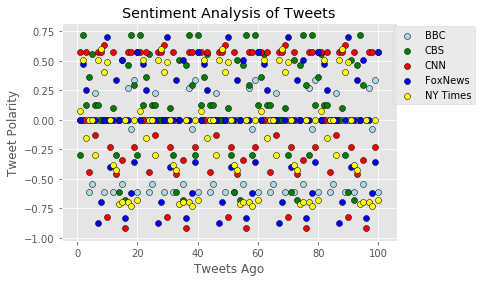

In [338]:
#Create DF of news source
# Create plot
BBCNews_df = tweet_df[tweet_df["User"]== "@BBCNews"]
CBSNews_df = tweet_df[tweet_df["User"]== "@CBSNews"]
CNNNews_df = tweet_df[tweet_df["User"]== "@CNN"]
FoxNews_df = tweet_df[tweet_df["User"]== "@FoxNews"]
NYTimes_df = tweet_df[tweet_df["User"]== "@NYTimes"]
plt.scatter(BBCNews_df["Tweets Ago"], BBCNews_df["Compound"], facecolors="lightblue", edgecolors = "black"),
plt.scatter(CBSNews_df["Tweets Ago"], CBSNews_df["Compound"], facecolors="green", edgecolors = "black"),
plt.scatter(CNNNews_df["Tweets Ago"], CNNNews_df["Compound"], facecolors="red", edgecolors = "black"),
plt.scatter(FoxNews_df["Tweets Ago"], FoxNews_df["Compound"], facecolors="blue", edgecolors = "black"),
plt.scatter(NYTimes_df["Tweets Ago"], NYTimes_df["Compound"], facecolors="yellow", edgecolors = "black"),

# # Incorporate the other graph properties
plt.title(f"Sentiment Analysis of Tweets")
# Create a legend
plt.legend(["BBC", "CBS", "CNN", "FoxNews", "NY Times"], loc='upper right', bbox_to_anchor=(1.25,1.01))
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.savefig("SentimentAnalysisPlot.png")
plt.show()

In [370]:
BBCNews_df.to_csv("BBCNews.csv")
BBCNews_df.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago,User
0,0.000,Wed Aug 29 19:54:08 +0000 2018,1.000,0.000,0.0,1,@BBCNews
1,0.000,Wed Aug 29 19:54:04 +0000 2018,1.000,0.000,0.0,2,@BBCNews
2,0.000,Wed Aug 29 19:54:03 +0000 2018,1.000,0.000,0.0,3,@BBCNews
3,-0.612,Wed Aug 29 19:54:03 +0000 2018,0.737,0.263,0.0,4,@BBCNews
4,-0.542,Wed Aug 29 19:54:01 +0000 2018,0.816,0.184,0.0,5,@BBCNews


In [366]:
# Create an array that contains the number of users each language has
users = ["BBC", "CBS", "CNN", "FoxNews", "NY Times"]
x_axis = np.arange(Compund)
# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks
plt.bar(x_axis, users, color='r', alpha=0.5, align="center")
# # Incorporate the other graph properties
plt.title(f"Overall Media Sentiment Based on Twitter")
# Create labels
plt.xlabel("User")
plt.ylabel("Tweet Polarity")
plt.show()

NameError: name 'Compund' is not defined